Digite o nome da sua imagem (ex. full_image.PNG): full_image.PNG
Digite um limite de brilho (ex. 200): 200


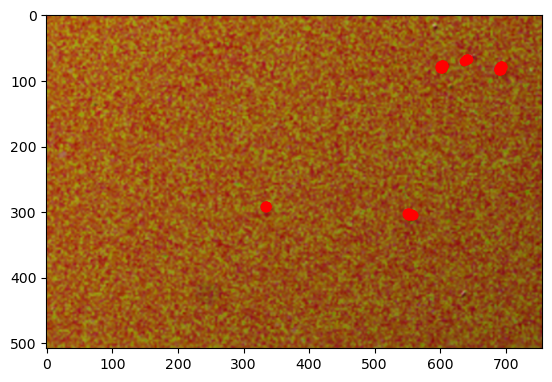

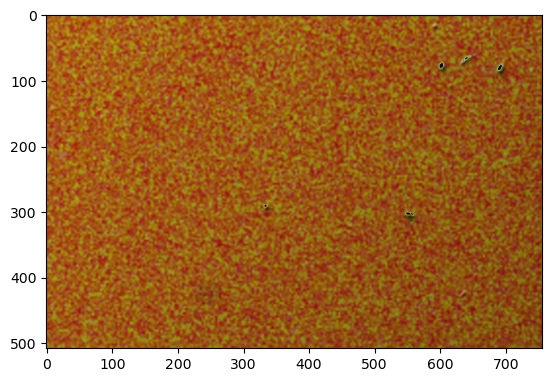

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def image_processing(input_file, bright_limit=200):
    if not os.path.isfile(input_file):
        print(f"Erro: O arquivo '{input_file}' não existe. Seu arquivo deve existir, estar na mesma pasta que este código, e deve conter o nome do formato (ex.PNG)")
        return
    
    #Lendo imagem
    full_image = cv2.imread(input_file)

    #Achando as coordenadas dos pixels mais brilhantes
    bright_coords = np.transpose(np.where(full_image > bright_limit))

    #Plotando a imagem original, detectando os pixels a serem removidos
    plt.imshow(cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB))
    for coord in bright_coords:
        y0, x0 = coord[0], coord[1]
        plt.plot(x0, y0, 'ro')

    #Definindo o limite de brilho para remover valores acima
    for coord in bright_coords:
        y0, x0 = coord[0], coord[1]
        full_image[y0, x0] = 0

    #Plotando imagem tratada
    plt.figure()
    plt.imshow(cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB))
    plt.show()

    #Convertendo a imagem em array
    img_data = np.array(full_image)

    #Cria um arquivo fits
    hdu = fits.PrimaryHDU(img_data)
    hdul = fits.HDUList([hdu])

    #Salva em formato fits
    output_file = input_file.replace('.PNG', '_processed.fits')
    hdul.writeto(output_file)

if __name__ == "__main__":
    #Pergunta o nome do arquivo no prompt
    input_file = input("Digite o nome da sua imagem (ex. full_image.PNG): ")

    #Pergunta o limite de brilho no prompt
    bright_limit = int(input("Digite um limite de brilho (ex. 200): "))

    image_processing(input_file, bright_limit)